# Health Information Systems and Decision Support Systems
## WPO 1: Introduction to data analysis and visualization  (14/02/20)

*Jakub Ceranka, Pieter Boonen, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>Niklaus Geisser 0554142</font>

### Goal
The goal of this practical session is to obtain insight in basic data analysis and data visualization techniques using Jupyter notebook. Basic operations presented today will be very useful during the next practical sessions, where you will need to design and build different decision systems. In this practical session, basic libraries like *pandas*, *matplotlib* and *seaborn* are introduced and applied to the Wisconsis breast cancer data set. Students must send their notebook using Assignment functionality of Canvas (VUB) or Dropbox functionality of Ufora (UGent) using .ipynb __and__ .html format before the end of the __20th of February__ (midnight). All practical sessions are graded. Additionally, a general feedback will be provided in the next practical session. 

__Hints__ for all practical sessions:
- Make sure that the code is pre-compiled and all output is generated correctly before handing in your notebook
- Pay attention to the layout of your figures (labels, titles, legends, colors,...)
- Chose relevant abbrevations for your variables, make sure your variables are not overwritten
- Read all assignments thoroughly
***
### Jupyter notebook

Jupyter notebook is an open-source application that allows editing and running notebook documents via a web browser. Notebook documents contain both computer code (python) and text elements (paragraphs, equations, figures,...). In this way, notebook files can serve as a complete computational record of a session, interleaving executable code with explanatory text, mathematics, and rich representations of resulting objects. Notebooks may be exported to a range of static formats, including HTML, reStructuredText, LaTeX and PDF. Basic functionalities of the Jupyter notebook are presented [here](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html).
***
### The breast cancer Wisconsin (diagnostic) data set

#### Fine needle aspirate procedure:
The dataset consists of features computed from a digitized image of a fine needle aspirate (FNA) of breast mass. For this type of biopsy technique, a thin hollow needle is inserted into an area of abnormal-appearing tissue for sampling cells. This sample is examined under a microscope which is used in the diagnosis of cancer. FNA is generally considered a safe procedure. 
***
#### FNA images:
The image below represents a smear of nuclei of benign and malignant breast mass cells. A difference in shape, size and smoothness of cells is visible.

 ![Image of cells](./FNA_cells.png "FNA_cells")
 
[<cite>Sizilio et al. 2012</cite>](https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/1475-925X-11-83) 
***
#### Features:
In oder to describe the images with numerical values, which can be easily interpreted by a computer, the features term has to be introduced. Features describe characteristics of the nuclei present in the microscopic image. Usually, the more of the independent features describing the image, the better.

Each cell nuclei has an independent set of features describing its individual properties:
- ID number of the patient from which the cell was collected.
- The medical diagnosis label assessed by a histologist/oncologist: Malignant or Benign. 
- The mean, standard deviation and the 3 worst values of 10 features describing mathematical properties of a cell were computed. This included:
        a) radius (distance from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry
        j) fractal dimension  (measure of cells self-similarity)
  
Some features were computed automatically, using automatic image processing algorithms, others acquired manually by medical experts. Microscopic images of 569 cells were analysed and labeled as benign or malignant. 
Class distribution: 357 benign, 212 malignant.
***
### Libraries

During this practical session, multiple libraries will be used for the analysis and visualization of data. You can use different version of libraries, however we recommend the following build:

- [__Pandas__](https://pandas.pydata.org/pandas-docs/stable/tutorials.html):     high performance library used for processing data structures and data analysis. __V 0.22.0__ 
- [__Numpy__](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html):      library used for scientific computing containing N-dimensional arrays, functions and Fourier transform. __V 1.13.3__ 
- [__Sci-kit Learn__](http://scikit-learn.org/stable/index.html):     Simple and efficient tools for machine learning and data analysis. __V 0.19.1__ 
- [__Matplotlib__](https://matplotlib.org/users/pyplot_tutorial.html): plotting library used for the visualization of data from python. __V 2.1.0__ 
- [__Seaborn__](https://seaborn.pydata.org/):    visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics. __V 0.8.1__ 

To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. The following code imports Pandas and represents it as 'pd'. You can additionally check for the module version using __version__ command. Information on updating the libraries using Anaconda can be found  [here](http://conda-test.pydata.org/docs/examples/update.html).

In [1]:
import pandas as pd
print(pd.__version__)

1.0.1


***
### Task 1: Importing data  

Provided dataset is represented as the comma-separated values (.csv) file which stores the tabular data in plain text.

Load the dataset (dataWisconsinBreast.csv) as the dataframe object using Panda's __read_csv__ function and have a look at the data using the __head()__ command. By default, the statement will print out top 5 rows of the dataset.
The __info()__ method is useful to get a quick description of the data, in particular the total number of rows, and each feature's type and number of non-null values.

Hint: To use a command from a library, type the abbrevation of the library followed by a dot and the function  


In [80]:
data_frame = pd.read_csv("dataWisconsinBreast.csv", delimiter=',', dtype=str)
data_frame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN
1,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,NaN
2,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,NaN
4,84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,...,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142,1479,0.111,0.1159,0.2439,0.1389,...,26.4,166.1,2027,0.141,0.2113,0.4107,0.2216,0.206,0.07115,NaN
565,926682,M,20.13,28.25,131.2,1261,0.0978,0.1034,0.144,0.09791,...,38.25,155,1731,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,34.12,126.7,1124,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782,NaN
567,927241,M,20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,...,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124,NaN


In [81]:
# See head
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN
1,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,NaN
2,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,NaN
4,84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,...,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,NaN


***
### Task 2: Dataset preprocessing

Lets have a closer look at the dataset. Using inbuilt Pandas function check if the dataset's shape matches with number of cells (rows) and features (columns) provided in the section 'Features'. 

__Hint: Something on the index for a column?__

Print the __head()__ of the dataframe again. The first column of the dataset is a random patients ID number which does not bring any clinically relevant information to the dataset. The last column represents NaN (not a number values). Remove these columns from the dataset and check if the shape has decreased accordingly. Additionally, remove all features which do not represent the mean (\_mean) value and assign it to the new dataframe.

The next step is to normalize (min-max scaling) the values. Most machine learning algorithms don't perform well when the numerical input values have very different scales. To rescale the data, we subtract the minimum from every value and divide by the maximum minus the minimum ($\frac{value-min}{max-min}$). 

Hint: Use __MinMaxScaler__ from __sklearn__ for the normalization. 

Now that the values are all normalized, the name of the features should be changed as well. Add *_N* after each feature using __rename()__ .

Hint: Printing a list with the names of the features will save you some time 

You can see that the dataset 'diagnosis' column has either M or B symbol, representing respectively malignant or benign cancer classification label. Split the dataframe into two datasets, representing all benign and malignant rows of features. Does the shapes of new datasets match the dataset class distribution? 

Save all three new datasets (cropped with B and M, cropped B and cropped M) as the .csv files in your working directory. Use these normalized datasets for the next tasks. 

#### Check data frame shape


In [82]:
# Check the shape of data_frame
data_frame.shape
# We have 569 examples or rows and 33 features

(569, 33)

#### Delete features that do not have predictive value

In [83]:
# Delete features that do not have predictive values (0 and 32 represent the id and the last column of the dataframe)
data_frame = data_frame.drop(data_frame.columns[[0,32]], axis=1) 
# data_frame.drop('Unnamed', axis=1, inplace=True)
data_frame.shape
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   diagnosis                569 non-null    object
 1   radius_mean              569 non-null    object
 2   texture_mean             569 non-null    object
 3   perimeter_mean           569 non-null    object
 4   area_mean                569 non-null    object
 5   smoothness_mean          569 non-null    object
 6   compactness_mean         569 non-null    object
 7   concavity_mean           569 non-null    object
 8   concave points_mean      569 non-null    object
 9   symmetry_mean            569 non-null    object
 10  fractal_dimension_mean   569 non-null    object
 11  radius_se                569 non-null    object
 12  texture_se               569 non-null    object
 13  perimeter_se             569 non-null    object
 14  area_se                  569 non-null    o

We can see that the number of features decreased from 33 to 31

#### Create a new dataframe with the features that do not represent the mean and remove them from the original dataframe

In [84]:
# Create a new dataframe with the features that do not represent the mean and remove them from the original dataframe
mean_data_frame = data_frame.iloc[:,0:11].copy() # Assign to a new dataframe the features that do represent the mean and make a copy so it can be treated as an independent dataframe
data_frame.drop(data_frame.columns[1:11], axis=1, inplace=True) # Drop the values that do not represent the mean from the original dataframe
#new_data_frame = data_frame.copy()
new_data_frame = mean_data_frame.copy()
data_frame = mean_data_frame

In [85]:
# Print info of mean data_frame
new_data_frame.info()
new_data_frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   diagnosis               569 non-null    object
 1   radius_mean             569 non-null    object
 2   texture_mean            569 non-null    object
 3   perimeter_mean          569 non-null    object
 4   area_mean               569 non-null    object
 5   smoothness_mean         569 non-null    object
 6   compactness_mean        569 non-null    object
 7   concavity_mean          569 non-null    object
 8   concave points_mean     569 non-null    object
 9   symmetry_mean           569 non-null    object
 10  fractal_dimension_mean  569 non-null    object
dtypes: object(11)
memory usage: 49.0+ KB


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871
1,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744
4,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142,1479,0.111,0.1159,0.2439,0.1389,0.1726,0.05623
565,M,20.13,28.25,131.2,1261,0.0978,0.1034,0.144,0.09791,0.1752,0.05533
566,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.159,0.05648
567,M,20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016


In [86]:
# Print info of the original data_frame
new_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   diagnosis               569 non-null    object
 1   radius_mean             569 non-null    object
 2   texture_mean            569 non-null    object
 3   perimeter_mean          569 non-null    object
 4   area_mean               569 non-null    object
 5   smoothness_mean         569 non-null    object
 6   compactness_mean        569 non-null    object
 7   concavity_mean          569 non-null    object
 8   concave points_mean     569 non-null    object
 9   symmetry_mean           569 non-null    object
 10  fractal_dimension_mean  569 non-null    object
dtypes: object(11)
memory usage: 49.0+ KB


#### Normalize values

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

##### Before

In [88]:
new_data_frame

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871
1,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744
4,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142,1479,0.111,0.1159,0.2439,0.1389,0.1726,0.05623
565,M,20.13,28.25,131.2,1261,0.0978,0.1034,0.144,0.09791,0.1752,0.05533
566,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.159,0.05648
567,M,20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016


##### After

In [89]:
# new_data_frame[new_data_frame.columns[1:20]] = scaler.fit_transform(new_data_frame[new_data_frame.columns[1:20]])
new_data_frame[new_data_frame.columns[1:10]] = scaler.fit_transform(new_data_frame[new_data_frame.columns[1:10]])
new_data_frame

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,0.521037,0.0226581,0.545989,0.363733,0.593753,0.792037,0.70314,0.731113,0.686364,0.07871
1,M,0.643144,0.272574,0.615783,0.501591,0.28988,0.181768,0.203608,0.348757,0.379798,0.05667
2,M,0.601496,0.39026,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.05999
3,M,0.21009,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.09744
4,M,0.629893,0.156578,0.630986,0.48929,0.430351,0.347893,0.463918,0.51839,0.378283,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.69,0.428813,0.678668,0.56649,0.526948,0.296055,0.571462,0.690358,0.336364,0.05623
565,M,0.62232,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.48663,0.349495,0.05533
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.25434,0.216753,0.263519,0.267677,0.05648
567,M,0.644564,0.66351,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.07016


##### Rename data frame

In [90]:
new_data_frame.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [91]:
new_data_frame.columns = list(map(lambda x: x+'_N', new_data_frame.columns))
new_data_frame = new_data_frame.rename(columns={'diagnosis_N': 'diagnosis'})

In [92]:
new_data_frame.columns

Index(['diagnosis', 'radius_mean_N', 'texture_mean_N', 'perimeter_mean_N',
       'area_mean_N', 'smoothness_mean_N', 'compactness_mean_N',
       'concavity_mean_N', 'concave points_mean_N', 'symmetry_mean_N',
       'fractal_dimension_mean_N'],
      dtype='object')

#### Split dataframes

In [93]:
m_data_frame = new_data_frame[new_data_frame['diagnosis'] == 'M']

In [94]:
m_data_frame

,diagnosis,radius_mean_N,texture_mean_N,perimeter_mean_N,area_mean_N,smoothness_mean_N,compactness_mean_N,concavity_mean_N,concave points_mean_N,symmetry_mean_N,fractal_dimension_mean_N
0,M,0.521037,0.0226581,0.545989,0.363733,0.593753,0.792037,0.70314,0.731113,0.686364,0.07871
1,M,0.643144,0.272574,0.615783,0.501591,0.28988,0.181768,0.203608,0.348757,0.379798,0.05667
2,M,0.601496,0.39026,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.05999
3,M,0.21009,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.09744
4,M,0.629893,0.156578,0.630986,0.48929,0.430351,0.347893,0.463918,0.51839,0.378283,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
563,M,0.659709,0.520122,0.685578,0.510498,0.517017,0.626403,0.743674,0.732604,0.55,0.06879
564,M,0.69,0.428813,0.678668,0.56649,0.526948,0.296055,0.571462,0.690358,0.336364,0.05623
565,M,0.62232,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.48663,0.349495,0.05533
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.25434,0.216753,0.263519,0.267677,0.05648


In [95]:
b_data_frame = new_data_frame[new_data_frame['diagnosis'] == 'B']

In [96]:
b_data_frame

,diagnosis,radius_mean_N,texture_mean_N,perimeter_mean_N,area_mean_N,smoothness_mean_N,compactness_mean_N,concavity_mean_N,concave points_mean_N,symmetry_mean_N,fractal_dimension_mean_N
19,B,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,0.05766
20,B,0.288655,0.202908,0.28913,0.159703,0.495351,0.330102,0.107029,0.154573,0.458081,0.06811
21,B,0.119409,0.0923233,0.114367,0.0553128,0.449309,0.139685,0.0692596,0.103181,0.381313,0.06905
37,B,0.286289,0.294555,0.268261,0.161315,0.335831,0.0560702,0.0600281,0.145278,0.205556,0.05863
46,B,0.0575039,0.241123,0.0547301,0.024772,0.301255,0.122845,0.0372071,0.0294085,0.358081,0.06503
...,...,...,...,...,...,...,...,...,...,...,...
558,B,0.360121,0.43862,0.363486,0.217858,0.28979,0.348506,0.241097,0.185686,0.19899,0.06147
559,B,0.21435,0.480893,0.212356,0.110286,0.360928,0.253727,0.260544,0.204026,0.165657,0.0657
560,B,0.334564,0.589787,0.328865,0.193807,0.421233,0.285933,0.104545,0.213917,0.240909,0.06171
561,B,0.199678,0.664863,0.185751,0.102863,0.197346,0.0496902,0,0,0,0.05502


##### Shapes of data frames

In [97]:
new_data_frame.shape

(569, 11)

In [98]:
m_data_frame.shape


(212, 11)

In [99]:
b_data_frame.shape

(357, 11)

We can see that if we add up the number of rows of m_data_frame and b_data_frame we have as a result the number of cells of the original data_frame

##### Export dataframes to csv

In [100]:
new_data_frame.to_csv(r'croped_b_m.csv')
m_data_frame.to_csv(r'croped_m.csv')
b_data_frame.to_csv(r'croped_b.csv')

***
### Task 3: Dataset statistics

In order to understand the differences and behavior of the data we need to calculate basic statistical values of features. Calculate and print the mean, median, standard deviation and 25th, 75th percentile of the both: malignant and benign dataset for concavity_mean feature on the same figure. 

Using *pandas* and *matplotlib* library prepare a boxplot of the distribution of the mean radius feature for benign and malignant cells (__Hint:__ concatenate columns of interest and use pandas function boxplot()). 

describe() method shows a summary of the numerical attributes for all features.

Hint: In order to plot directly in Jupyter notebook use the following command: %matplotlib inline

#### General Description

In this section, we will show a summary of the numerical attributes for the features of both dataframes using the describe method

In [101]:
b_data_frame.describe()

,diagnosis,radius_mean_N,texture_mean_N,perimeter_mean_N,area_mean_N,smoothness_mean_N,compactness_mean_N,concavity_mean_N,concave points_mean_N,symmetry_mean_N,fractal_dimension_mean_N
count,357,357.00000,357.000000,357.000000,357.000000,357.00000,357.000000,357.0,357.0,357.000000,357
unique,1,284.00000,311.000000,338.000000,341.000000,326.00000,345.000000,336.0,337.0,298.000000,326
top,B,0.15519,0.287792,0.268261,0.156394,0.29322,0.292375,0.0,0.0,0.330303,0.05913
freq,357,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,13.0,13.0,4.000000,3


In [102]:
m_data_frame.describe()

,diagnosis,radius_mean_N,texture_mean_N,perimeter_mean_N,area_mean_N,smoothness_mean_N,compactness_mean_N,concavity_mean_N,concave points_mean_N,symmetry_mean_N,fractal_dimension_mean_N
count,212,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212
unique,1,196.000000,199.000000,191.000000,205.000000,190.000000,204.000000,206.000000,208.000000,188.000000,205
top,M,0.401297,0.347311,0.628222,0.395122,0.554934,0.341145,0.282099,0.731113,0.420707,0.05391
freq,212,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2


#### Statistical Analysis

In [130]:
concavity = "concavity_mean_N"
radius = "radius_mean_N"
texture = "texture_mean_N"

##### cropped with M dataframe

In [104]:
m_data_frame[concavity].mean()

0.3766980247917806

In [105]:
m_data_frame[concavity].std()

0.175771621017472

In [106]:
m_data_frame[concavity].median()

0.35461574507966254

In [107]:
m_data_frame[concavity].quantile(0.25) # 25 percentil

0.25661902530459235

In [108]:
m_data_frame[concavity].quantile(0.75) # 75 percentil

0.47574976569821925

##### cropped with B dataframe

In [109]:
b_data_frame[concavity].mean()

0.10791382616776801

In [110]:
b_data_frame[concavity].std()

0.10178573347015366

In [111]:
b_data_frame[concavity].median()

0.08690253045923148

In [112]:
b_data_frame[concavity].quantile(0.25) # 25 percentil

0.04758669165885661

In [113]:
b_data_frame[concavity].quantile(0.75) # 75 percentil

0.1405576382380506

##### Distribution of the mean radius feature

{'whiskers': [<matplotlib.lines.Line2D at 0x1a17b59048>,
 'caps': [<matplotlib.lines.Line2D at 0x1a17b596d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a17af3c88>,
 'medians': [<matplotlib.lines.Line2D at 0x1a17b59d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a17b650f0>,
 'means': []}

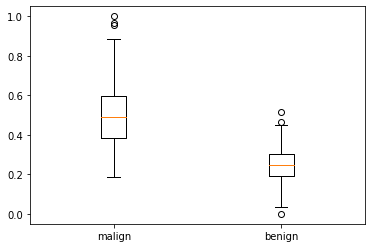

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot([m_data_frame[radius],b_data_frame[radius]],labels=["malign","benign"])

Can you already spot the differences in data distributions between benign and malignant cancer? What conclusions regarding the size and shape of malignant vs benign cells can be drawn?

<b>From the statistical analysis made on "concavity mean" and "radius mean" features, we can see than on average, the values for beningn cases are smaller than malign ones.</b>

***
### Task 4: Visualization of nuclei features

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). Using *matplotlib* plot a histogram of a mean radius of malignant cancer cells. On the same figure add a histogram (using a different color) of benign cancer cells radius (Hint: use *matplotlib* function hist() ). Do the histograms correlate with each other?

Histogram is a great tool to visualize the distribution of a single feature. However, often a dataset consists of several features and therefore another way of visualization has to be used.

A 2D scatterplot shows a relation between two features. Scatterplots are very often used to get a feeling of the data and work as a help tool for choosing a correct design of decision system which you will build during the next practical sessions.

Using *matplotlib*, plot on the same figure the relation of the radius_mean feature in function of the texture_mean feature for benign and malignant cases. Mark classes with different color and provide a legend box.

Scatterplots give a possibility to analyse the trends and relations between different features. Looking at the plotted scatterplot, you can see that there seem to be a linear relation between radius and texture. Lets try to find it.

Using linear regression from Sci-Kit learn toolbox, fit a linear function and plot it on the same scatterplot. Give the formula of the linear function.

##### Histograms

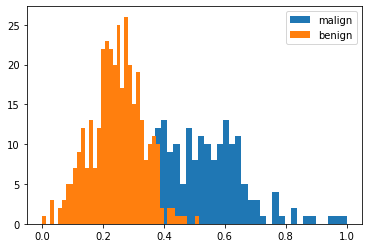

In [127]:
plt.hist(m_data_frame[radius],bins=40,label='malign')
plt.hist(b_data_frame[radius],bins=40,label='benign')

# plt.hist(m_data_frame[radius],label='malign')
# plt.hist(b_data_frame[radius],label='benign')
plt.legend()


It can be seen that both histograms follow more or less the same distribution and overlap at some point.

#### Scatterplots

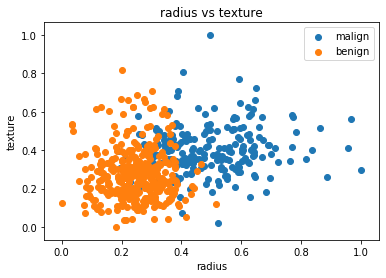

In [135]:
plt.scatter(m_data_frame[radius], m_data_frame[texture],label="malign")
plt.scatter(b_data_frame[radius], b_data_frame[texture],label="benign")
plt.title("radius vs texture")
plt.xlabel('radius')
plt.ylabel('texture')
plt.legend()

#### Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression

##### Malign Case

In [138]:
X_m = m_data_frame[radius].values.reshape(-1,1)
y_m = m_data_frame[texture].values.reshape(-1,1)
reg_m = LinearRegression().fit(X_m, y_m)

In [155]:
reg_m.intercept_[0] # Intercept

0.3577231908923919

In [159]:
reg_m.coef_[0][0] # Slope

0.08978141902411485

In [156]:
y_m = reg_m.coef_[0]*m_data_frame[radius].values.reshape(-1,1)+reg_m.intercept_[0]

Text(0, 0.5, 'texture')

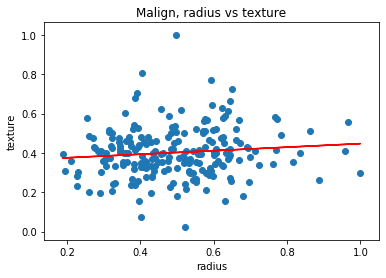

In [157]:
plt.scatter(m_data_frame[radius], m_data_frame[texture],label="malign")
plt.plot(m_data_frame[radius],y_m,'r')
plt.title("Malign, radius vs texture")
plt.xlabel('radius')
plt.ylabel('texture')


Formula of linear function:

In [160]:
print("{0}*X + {1}".format(reg_m.coef_[0][0],reg_m.intercept_[0]))

0.08978141902411485*X + 0.3577231908923919


##### Benign Case

In [164]:
X_b = b_data_frame[radius].values.reshape(-1,1)
y_b = b_data_frame[texture].values.reshape(-1,1)
reg_b = LinearRegression().fit(X_b, y_b)

In [165]:
reg_b.intercept_[0] # Intercept

0.2920305997805322

In [166]:
reg_b.coef_[0][0] # Slope

-0.05956210808261637

In [167]:
y_b = reg_b.coef_[0]*b_data_frame[radius].values.reshape(-1,1)+reg_b.intercept_[0]

Text(0, 0.5, 'texture')

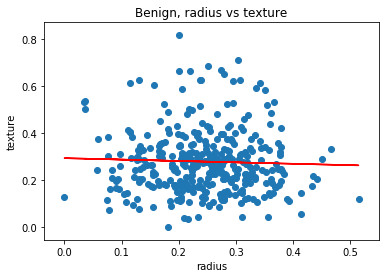

In [168]:
plt.scatter(b_data_frame[radius], b_data_frame[texture],label="benign")
plt.plot(b_data_frame[radius],y_b,'r')
plt.title("Benign, radius vs texture")
plt.xlabel('radius')
plt.ylabel('texture')

Formula of linear function:

In [169]:
print("{0}*X + {1}".format(reg_b.coef_[0][0],reg_b.intercept_[0]))

-0.05956210808261637*X + 0.2920305997805322


#### Complete dataframe

In [172]:
X = new_data_frame[radius].values.reshape(-1,1)
y = new_data_frame[texture].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

In [173]:
y = reg.coef_[0]*new_data_frame[radius].values.reshape(-1,1)+reg.intercept_[0]

Text(0, 0.5, 'texture')

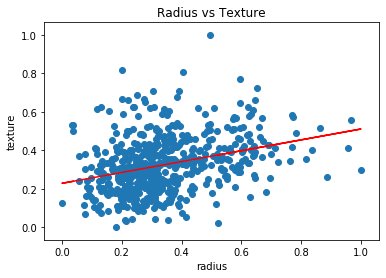

In [175]:
plt.scatter(new_data_frame[radius], new_data_frame[texture])
plt.plot(new_data_frame[radius],y,'r')
plt.title("Radius vs Texture")
plt.xlabel('radius')
plt.ylabel('texture')

Formula of linear function:

In [177]:
print("{0}*X + {1}".format(reg.coef_[0][0],reg.intercept_[0]))

0.28236529082468476*X + 0.22846297548918398


***
### Task 5: High-level visualization

A scatter plot is a good tool to visualize the distribution of values for small number of instances. However, with very large numbers of instances, all plotted points tent to become inseparable, forming one large cluster of the same color intensity. That issue can be solved by introduction of density plots. Density plot represents data in the same way as the scatterplot, but it changes its density dependent on the number of points in its vicinity. Using *seaborn* library and *kdeplot* function, plot a density plot of the same features (radius in function of texture) for two class labels (benign and malignant) on the same figure. You can easily see that it is much easier now to interpret and separate features.

You have plotted the relation between two features now, but what about all of the others. They probably contain additional relevant information for better understanding of the dataset. *Pandas* library provides an inbuilt function *scatter_matrix*, which shows a relations between all inputed features simultaneously. Use a complete dataset to create a scatter_matrix plot. 

Additionally to the graphical representation of feature pairs, numbers can be generated too. Use *pandas* *corr()* function to investigate correlations of radius_mean feature.
What can you say about the relation between radius_mean against different features? Are some features dependent on another? If so, which? Is it worth to use all of the features in your future machine learning system, why?


#### Density plots

In [178]:
import seaborn as sns
sns.set(color_codes=True)

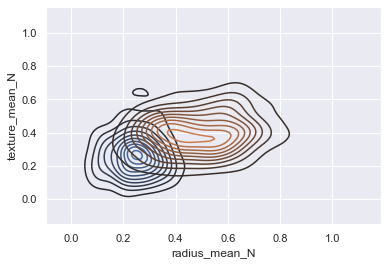

In [180]:
sns.kdeplot(b_data_frame[radius], b_data_frame[texture])
sns.kdeplot(m_data_frame[radius], m_data_frame[texture])

##### Scatter Matrix

In [182]:
from pandas.plotting import scatter_matrix

In [186]:
new_data_frame

,diagnosis,radius_mean_N,texture_mean_N,perimeter_mean_N,area_mean_N,smoothness_mean_N,compactness_mean_N,concavity_mean_N,concave points_mean_N,symmetry_mean_N,fractal_dimension_mean_N
0,M,0.521037,0.0226581,0.545989,0.363733,0.593753,0.792037,0.70314,0.731113,0.686364,0.07871
1,M,0.643144,0.272574,0.615783,0.501591,0.28988,0.181768,0.203608,0.348757,0.379798,0.05667
2,M,0.601496,0.39026,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.05999
3,M,0.21009,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.09744
4,M,0.629893,0.156578,0.630986,0.48929,0.430351,0.347893,0.463918,0.51839,0.378283,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.69,0.428813,0.678668,0.56649,0.526948,0.296055,0.571462,0.690358,0.336364,0.05623
565,M,0.62232,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.48663,0.349495,0.05533
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.25434,0.216753,0.263519,0.267677,0.05648
567,M,0.644564,0.66351,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.07016


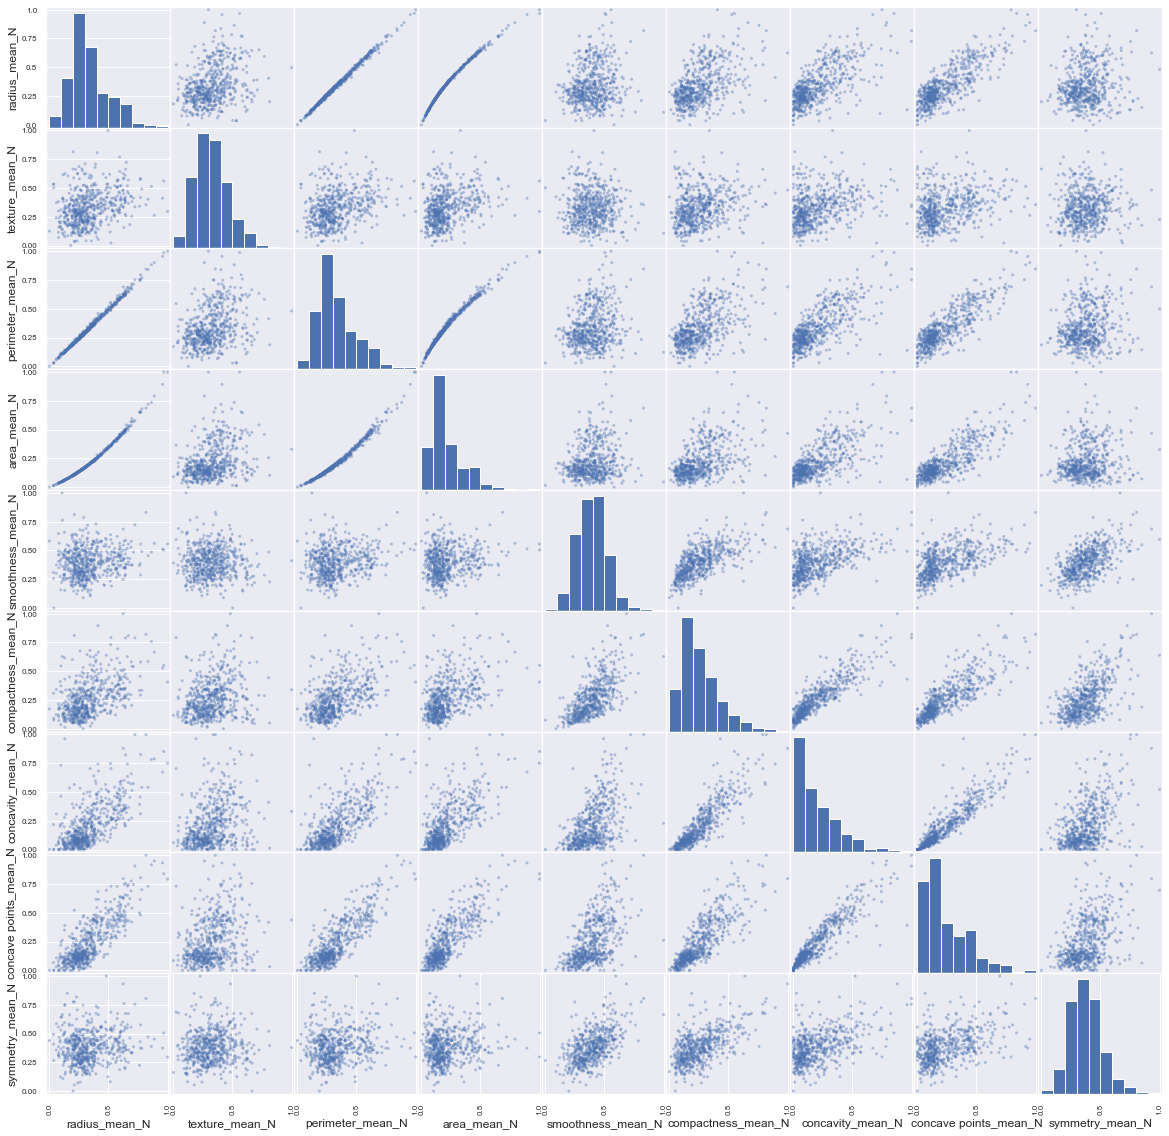

In [196]:
scatter_matrix(new_data_frame.iloc[:,1:10].apply(pd.to_numeric),alpha=0.4,figsize=(20,20))
plt.show()

YOUR ANSWER HERE


You can now see the features distribution, but we can not distinguish which point in the provided scatter matrix corresponds to which class. Using *seaborn's pairplot* function print the scatter matrix of radius, texture and concavity for malignant and benign cells.

Could you print the same plot (radius, texture & concavity for malignant and benign cells) but instead of a seaborn scatterplot matrix (pairplot) use density distribution matrix (kdeplot matrix)?

In [ ]:
# YOUR CODE HERE


### Task 6: Validation of classifier's performance 
Load prediction.csv file. The file stores support-vector machine classifier results for each instance in the dataset (classes malignant or benign). Inspect the prediction dataframe. Extract a column predicted from the prediction.csv dataset and column 'diagnosis' from the initial dataset (dataWisconsinBreast.csv) and store them in new dataframes. 

We are now going to assess the performance of the classifier. Write a python function counting and returning false positive, false negative, true positive and true negative instances. Using obtained statistical values, calculate accuracy, sensitivity, specificity of the classifier. 

Scikit-learn library provides functions such as *metrics.classification_report*, which calculate and printout the same measures. See the Classification metrics section of the user guide for further details. Does the output of the scikit-learn functions match the ones calculated by you?

Briefly describe the difference between calculated measures. 
During classification of breast biopsies, it is highly important not to miss a malignant case. In other words, we do not want our classifier to classify malignant cell as benign case. The performance of the classifier can be optimized towards such behavior. Which statistical measure should we optimize (increase) in order to decrease these wrong classifications as much as possible?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
